https://azad-wolf.medium.com/latent-space-representation-a-hands-on-tutorial-on-autoencoders-in-tensorflow-57735a1c0f3f

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib


## create train and validation datasets
DB_PATH = "//kaggle/input/fashion-product-images-small/images/"
BUFFER_SIZE = 10000
BATCH_SIZE = 1000
IMG_WIDTH = 60
IMG_HEIGHT = 60


2024-05-29 17:40:59.694999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 17:40:59.695086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 17:40:59.952092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!pwd

!ls -U //kaggle/input/fashion-product-images-small/images | head -4


/kaggle/working
31973.jpg
30778.jpg
19812.jpg
22735.jpg
ls: write error: Broken pipe


In [18]:

def load(image_file):
    print(image_file)
    image = tf.io.read_file(image_file)
    print(image)
    image = tf.image.decode_jpeg(image,channels=3)

    input_image = tf.cast(image, tf.float32)
    print(input_image)
    return input_image

def random_crop(input_image):
    cropped_image = tf.image.random_crop(
      input_image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image

def resize(input_image):
    input_image = tf.image.resize(input_image, [IMG_HEIGHT, IMG_WIDTH],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image

def normalize(input_image):
    input_image = (input_image / 255)
    return input_image

@tf.function()
def random_jitter(input_image):
    input_image = random_crop(input_image)
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        
    return input_image

def load_image_train(image_file):
    input_image = load(image_file)
    #input_image = random_jitter(input_image)
    input_image = resize(input_image)
    input_image = normalize(input_image)

    return input_image,input_image

def load_image_test(image_file):
    input_image = load(image_file)
    #input_image = random_jitter(input_image)
    input_image = resize(input_image)
    input_image = normalize(input_image)
    return input_image,input_image


data_dir = pathlib.Path(DB_PATH)
image_count = len(list(data_dir.glob('*.jpg')))
print(f"image count {image_count}")
dataset = tf.data.Dataset.list_files(DB_PATH + "*.jpg")


val_size = int(image_count * 0.2)
train_ds = dataset.skip(val_size)
val_ds = dataset.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())


train_ds = train_ds.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_ds = val_ds.map(load_image_test)
val_ds = val_ds.batch(BATCH_SIZE)



image count 44441
35553
8888
Tensor("args_0:0", shape=(), dtype=string)
Tensor("ReadFile:0", shape=(), dtype=string)
Tensor("Cast:0", shape=(None, None, 3), dtype=float32)
Tensor("args_0:0", shape=(), dtype=string)
Tensor("ReadFile:0", shape=(), dtype=string)
Tensor("Cast:0", shape=(None, None, 3), dtype=float32)


In [19]:
file_pattern = DB_PATH + "*.jpg"
print(file_pattern)
dataset = tf.data.Dataset.list_files(file_pattern)

val_size = int(image_count * 0.2)
train_ds = dataset.skip(val_size)
val_ds = dataset.take(val_size)

train_ds.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)

train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

//kaggle/input/fashion-product-images-small/images/*.jpg
Tensor("args_0:0", shape=(), dtype=string)
Tensor("ReadFile:0", shape=(), dtype=string)
Tensor("Cast:0", shape=(None, None, 3), dtype=float32)


In [ ]:
print(val_size)

In [ ]:
image_dataset = tf.data.Dataset.list_files(DB_PATH+"*.jpg")
print(next(iter(image_dataset)))

In [7]:
tds=val_ds.take(1)

In [ ]:
??tds

The example I am following expects two results from take, but there is only 1 (a dataset).  However, it is not obvious how I extract the actual data from the dataset.  This example shows how to step through the dataset. But I only have one item, so it is clunky to have to specify a loop to get the one piece of info I need!

In [9]:
for elem in tds:
  print(elem.numpy())

b'//kaggle/input/fashion-product-images-small/images/7452.jpg'


Still a bit clunky, but this might work...

In [10]:
elem = next(iter(tds))
print(elem.numpy())

b'//kaggle/input/fashion-product-images-small/images/37160.jpg'


In [18]:
images = (val_ds.take(1).as_numpy_iterator())
print(images)

In [12]:
list(val_ds.as_numpy_iterator())[0]

b'//kaggle/input/fashion-product-images-small/images/11790.jpg'

In [24]:
tds=val_ds.take(45).as_numpy_iterator()
elem = next(iter(tds))
print(elem)

b'//kaggle/input/fashion-product-images-small/images/17431.jpg'


In [ ]:
import cv2 as cv
img = cv.imread('//kaggle/input/fashion-product-images-small/images/17431.jpg')
plt.imshow(img)

In [ ]:
import cv2 as cv
img = cv.imread(elem.decode("utf-8"))
plt.imshow(img)

In [25]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(45):
    tds = val_ds.take(1).as_numpy_iterator().next()
    ax = plt.subplot(3, 15, i + 1)
    dcd = tds.decode("utf-8")
    print(dcd)
    img = cv.imread(dcd)
    plt.imshow(img)
    plt.axis("off")
    

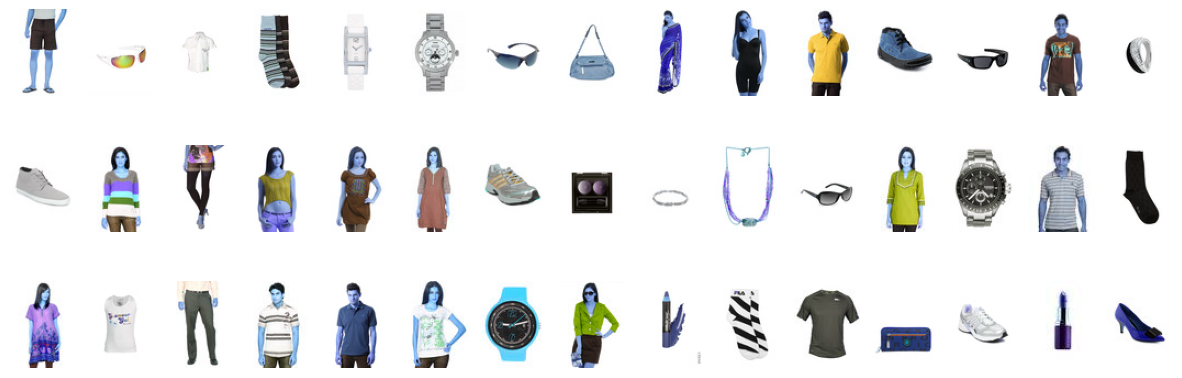

In [38]:


plt.figure(figsize=(15, 5))
i = 0
for tds in val_ds.take(45).as_numpy_iterator():
    ax = plt.subplot(3, 15, i + 1)
    img = cv.imread(tds.decode("utf-8"))
    plt.imshow(img)
    plt.axis("off")
    i = i + 1

In [48]:
# Embedding Images to PCA Space
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(32)
imgs_list = []
vis_imgs = []
for i in range(BATCH_SIZE):
    image = val_ds.take(1).as_numpy_iterator().next()
    image = image.decode("utf-8")
    image = cv.imread(image)
    vis_imgs.append(tf.keras.preprocessing.image.img_to_array(image))
    image = tf.image.rgb_to_grayscale(image)
    img_arr = tf.keras.preprocessing.image.img_to_array(image)
    imgs_list.append(img_arr.ravel())
img_mat = np.array(imgs_list)
print("Image Mat Shape:")
print(img_mat.shape)
pca_feat = pca.fit_transform(img_mat)
print("No. of PCA Features:")
print(pca_feat.shape)

Image Mat Shape:
(1000, 4800)
No. of PCA Features:
(1000, 32)


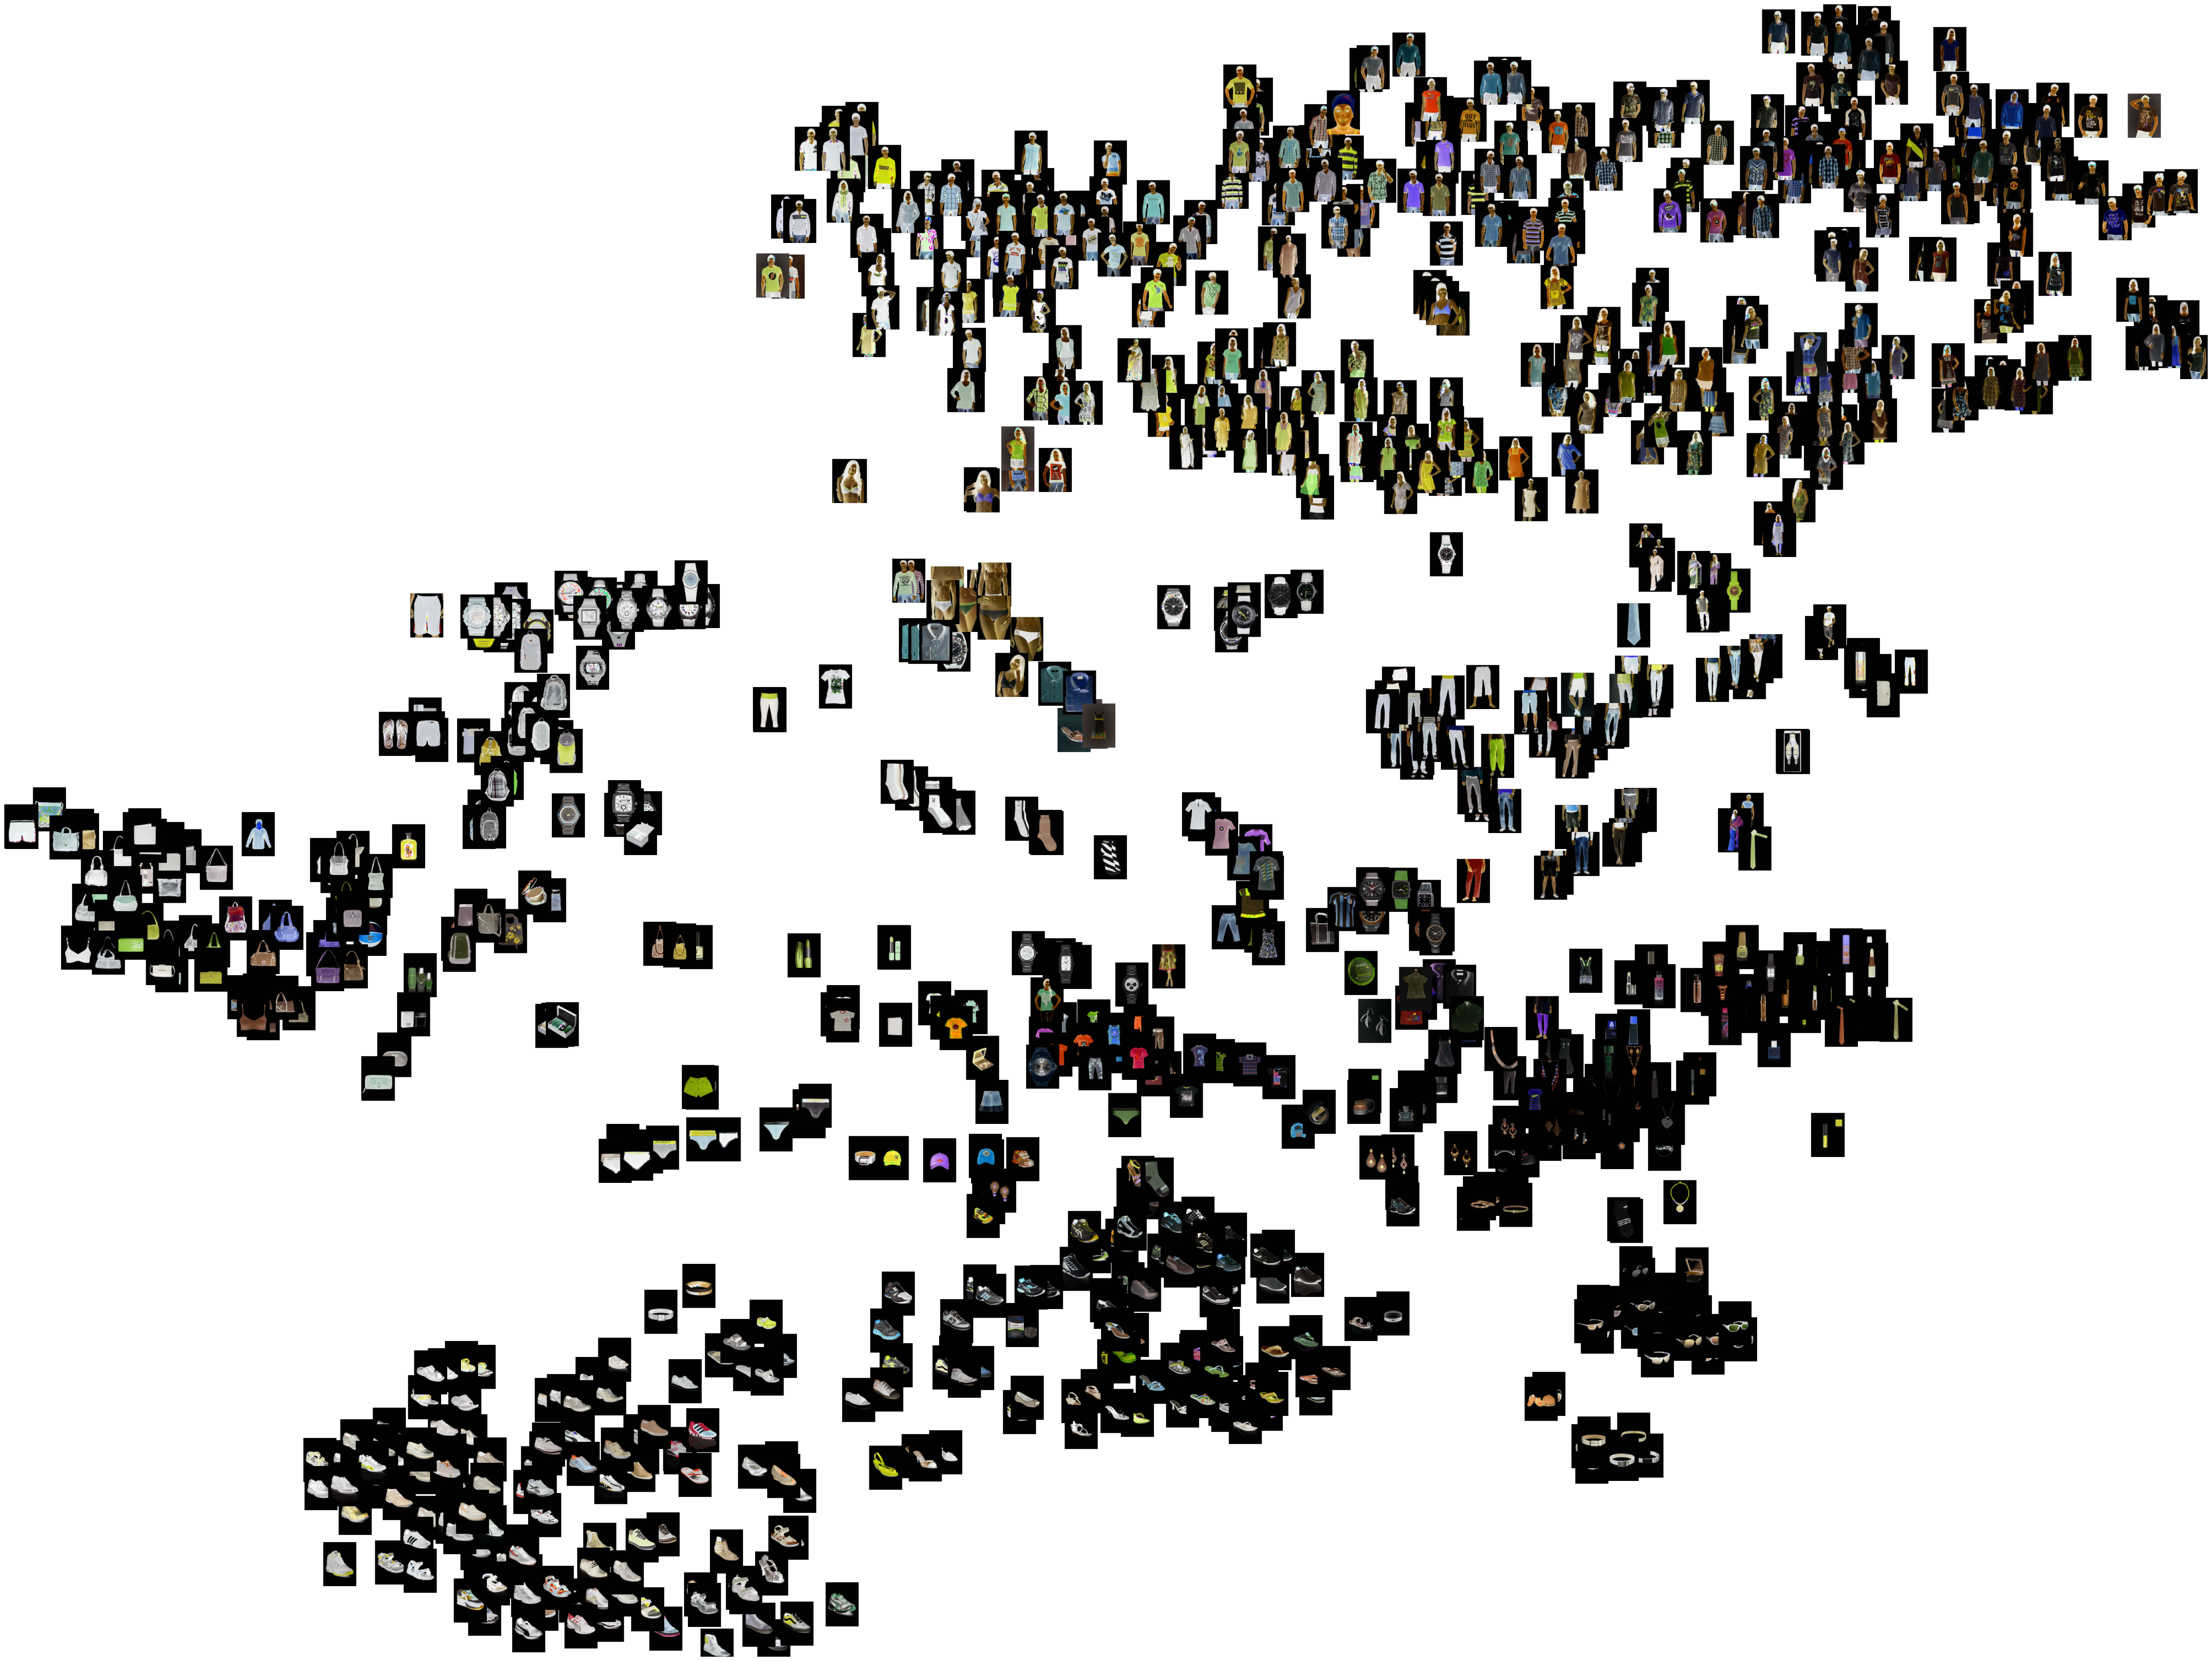

In [50]:

from PIL import Image
from sklearn.manifold import TSNE
max_dim = 60

def visualize_space(X,images,outfile):

    tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    tx, ty = tsne[:,0], tsne[:,1]
    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))
    width = 4000
    height = 3000


    full_image = Image.new('RGBA', (width, height))
    for img, x, y in zip(images, tx, ty):
        img = np.array(img)
        tile = Image.fromarray(np.uint8(img*255))
        full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

    plt.figure(figsize = (66,50))
    plt.imshow(full_image)
    plt.axis("off")
    full_image.save(outfile)

X = np.array(pca_feat)
visualize_space(X,vis_imgs,"tSNE-PCA-fashiondb.png")

In [22]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K

batch_size = 16
latent_dim = 32  # Number of latent dimension parameters

input_img = Input(shape=(60, 60, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D( (2, 2), padding='same')(x)

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

shape_before_flattening = K.int_shape(x)
print(shape_before_flattening)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

Z = Dense(latent_dim)(x)
print(K.int_shape(Z))

encoder = Model(input_img,Z)
encoder.summary()

(None, 8, 8, 1)
(None, 32)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 4)      │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 1)        │            37 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,377 (48.35 KB)

 Trainable params: 12,377 (48.35 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# decoder takes the latent distribution sample as input
decoder_input = Input(K.int_shape(Z)[1:])
x = Dense(15*15*4, activation='relu', name="intermediate_decoder", input_shape=(latent_dim,))(decoder_input)
# Expand to 900 total pixels
x = Dense(900, activation='sigmoid', name="original_decoder")(x)
x = Reshape((15,15,4),input_shape=(900,))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)

x = Conv2DTranspose(3, (3, 3), padding='same')(x)
x = UpSampling2D( (2, 2))(x)


# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(Z)

decoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ intermediate_decoder (Dense)    │ (None, 900)            │        29,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ original_decoder (Dense)        │ (None, 900)            │       810,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 15, 15, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 15, 15, 3)      │           111 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 30, 30, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 30, 30, 3)      │            84 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 60, 60, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,795 (3.21 MB)

 Trainable params: 840,795 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# VAE model statement
ae = Model(input_img,z_decoded)
ae.compile(optimizer='adam', loss='mse')

ae.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 60, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 4)      │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 1)        │            37 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_9 (Functional)       │ (None, 60, 60, 3)      │       840,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853,172 (3.25 MB)

 Trainable params: 853,172 (3.25 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import EarlyStopping
# run the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = ae.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stopping],verbose=1)

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("functional_11_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 60, 60, 3), but input has incompatible shape (None,)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None,), dtype=string)
  • training=True
  • mask=None

In [ ]:
# Project validation set into Latent Space
vis_imgs = []
for input_images,output_images in val_ds.take(1):
    latent_vec = encoder(input_images)
    for i in range(BATCH_SIZE):
        vis_imgs.append(tf.keras.preprocessing.image.img_to_array(input_images[i]))
print("Dimension of Latent Space:")
print(latent_vec.shape)

In [ ]:
X= np.array(latent_vec)

visualize_space(X,vis_imgs,"tSNE-Latent-fashiondb.png")